In [41]:
# library imports
import re
import requests
import itertools
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [42]:
%matplotlib inline

In [75]:
# parse url
country = "italy"
url = "https://www.worldometers.info/coronavirus/country/"+country
soup = BeautifulSoup(requests.get(url).content,"html.parser")

In [76]:
# strip out all Highcharts data for specific events
full_html_daily_cases = soup.find_all('script', type="text/javascript",text=re.compile("graph-cases-daily"))
full_html_daily_deaths = soup.find_all('script', type="text/javascript",text=re.compile("graph-deaths-daily"))
full_html_daily_cured = soup.find_all('script', type="text/javascript",text=re.compile("cases-cured-daily"))

In [77]:
# parse text block
test = full_html_daily_cured[0].text

In [78]:
regex =  re.compile('\n^(.*?):(.*?)$|,', re.MULTILINE) #compile regex
js_text = re.findall(regex, test) #  find first item @ new line to : and 2nd item @ from : to the end of the line or , 

In [79]:
test = [[jt_tuple.strip() for jt_tuple in jt_array] for jt_array in js_text]

In [80]:
all_categories = [x for x in test if x[0] != '']

In [81]:
datablock = [x for x in test if x[0] == 'categories' or x[0] == 'data' or x[0] == 'name']

In [82]:
datablock

[['categories',
  '["Feb 15","Feb 16","Feb 17","Feb 18","Feb 19","Feb 20","Feb 21","Feb 22","Feb 23","Feb 24","Feb 25","Feb 26","Feb 27","Feb 28","Feb 29","Mar 01","Mar 02","Mar 03","Mar 04","Mar 05","Mar 06","Mar 07","Mar 08","Mar 09","Mar 10","Mar 11","Mar 12","Mar 13","Mar 14","Mar 15","Mar 16","Mar 17","Mar 18","Mar 19"]        },'],
 ['name', "'New Recoveries',"],
 ['data',
  '[0,0,0,0,0,0,1,1,0,-1,1,1,42,1,4,33,66,11,116,138,109,66,33,102,280,41,213,181,527,369,414,192,1084,415]        },'],
 ['name', "'New Cases',"],
 ['data',
  '[null,0,0,0,0,1,17,58,78,72,94,147,185,234,239,573,335,466,587,769,778,1247,1492,1797,977,2313,2651,2547,3497,3590,3233,3526,4207,5322]        }']]

In [83]:
data_string = datablock[2][1]
cat_string = datablock[0][1]
name_string = datablock[1][1]

In [84]:
# clean up data and categories
data = re.sub('[\s+\[\]{}]', '', data_string)[0:-1].split(',')
data = [0 if x=='null' else x for x in data]
data = list(map(int,data))
cats = re.sub('["+\[\]{}]', '', cat_string).split(',')
name = re.sub('[\',+]', '', name_string)

In [85]:
df = pd.DataFrame(list(zip(cats, data)),columns=['Date','Value'])
df.set_index('Date', inplace=True)
df.replace("nan",0,inplace=True)

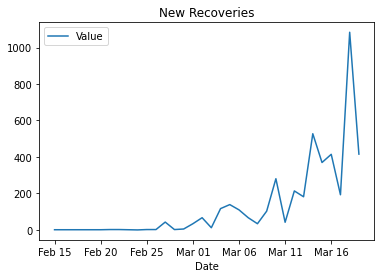

In [86]:
df.plot(title=name)

# Plot data
#plt.figure()
#plt.title(name)
#plt.xticks(rotation=90)
#plt.plot(df)
#plt.show()

In [87]:
df

,Value
Date,
Feb 15,0
Feb 16,0
Feb 17,0
Feb 18,0
Feb 19,0
Feb 20,0
Feb 21,1
Feb 22,1
Feb 23,0
